In [1]:
import numpy as np
import h5py
from scipy.ndimage.measurements import center_of_mass

from matplotlib import pyplot as plt

import lib.data as hd

In [2]:
phase_ticks = np.arange(-180, 181, 45)
freq_limit_low = 5.1
freq_limit_high = 7.8
ticks_pi = np.linspace(-np.pi, np.pi, 9)
ticks_pi_deg = ticks_pi * 180/np.pi

In [3]:
face_colors = {
    'orange': [0.8906, 0.4609, 0.4062],
    'gray': [0.6523, 0.6484, 0.6484],
    'blue': [0.5156, 0.5977, 0.8789]
}
edge_colors = {
    'orange': [0.9961, 0, 0],
    'gray': [0.4805, 0.4766, 0.4766],
    'blue': [0, 0, 0.9961]
}

edge_colors_arr = [ec for ec in edge_colors.values()]
face_colors_arr = [fc for fc in face_colors.values()]

cycler = (plt.cycler(mec=edge_colors_arr)+
          plt.cycler(mfc=face_colors_arr)+
          plt.cycler(color=edge_colors_arr))

In [4]:
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 20,
    'lines.markeredgewidth': 2,
    'lines.markersize': 9,
    'lines.marker': 'o',
    'lines.linestyle': '',
    'lines.linewidth': 3,
    'axes.prop_cycle': cycler
    })

In [5]:
source_path = 'data/phase_diagram_56.h5'
images, data = hd.load_dataset(source_path,
                               ['micromotion_phase', 'phase', 'freq'])
mmphase = data['micromotion_phase']
images = hd.normalize_single_images(images)

In [6]:
def calculate_cms(ims):
    cms = []
    for idx in range(0, ims.shape[0]):
        img = np.squeeze(ims[idx])
        cms.append(center_of_mass(img))
    cms = np.array(cms)
    azimuthal = np.arctan2(cms[:, 1]-ims.shape[1]/2, cms[:, 0]-ims.shape[2]/2)*180/np.pi
    return azimuthal

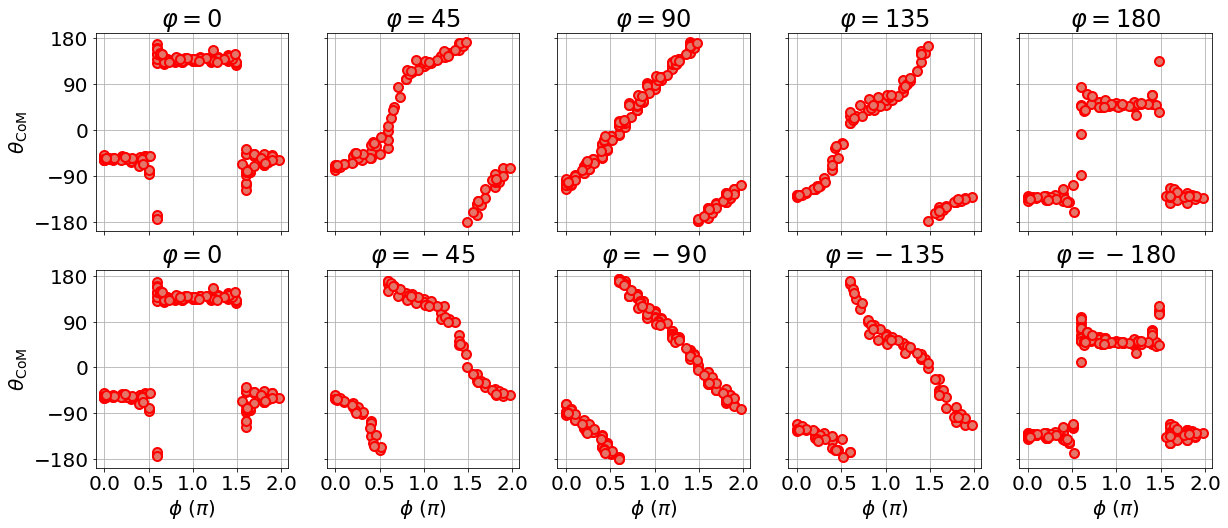

In [39]:
print_phases = [0, 45, 90, 135, 180]

fig, axes = plt.subplots(2, len(print_phases), figsize=[20, 8], sharey='row', sharex='col')

for phase_id in range(len(print_phases)):
    phase = print_phases[phase_id]
    selection_map = phase == data['phase']
    azimuthals = calculate_cms(images[selection_map])
    
    axes[0, phase_id].plot(data['micromotion_phase'][selection_map]/np.pi, azimuthals)
    axes[0, phase_id].set_yticks([-180, -90, 0, 90, 180])
    axes[0, phase_id].set_xticks([0, 0.5, 1, 1.5, 2])
    axes[0, phase_id].grid()
    axes[0, phase_id].set_title(r'$\varphi={}$'.format(phase))
    if phase_id == 0:
        axes[0, phase_id].set_ylabel(r'$\theta_{\mathrm{CoM}}$')

for phase_id in range(len(print_phases)):
    phase = -print_phases[phase_id]
    selection_map = phase == data['phase']
    azimuthals = calculate_cms(images[selection_map])
    
    axes[1, phase_id].plot(data['micromotion_phase'][selection_map]/np.pi, azimuthals)
    axes[1, phase_id].set_yticks([-180, -90, 0, 90, 180])
    axes[1, phase_id].set_xticks([0, 0.5, 1, 1.5, 2])
    axes[1, phase_id].set_title(r'$\varphi={}$'.format(phase))
    axes[1, phase_id].grid()
    if phase_id == 0:
        axes[1, phase_id].set_ylabel(r'$\theta_{\mathrm{CoM}}$')
    axes[1, phase_id].set_xlabel(r'$\phi$ ($\pi$)')
#plt.savefig("plots/appendix/appendix_micromotion_com.pdf", bbox_inches='tight')